In [5]:
%load_ext autoreload
%autoreload 2

In [82]:
import numpy as np
import maze_bonus as mz 
import matplotlib.pyplot as plt

In [85]:
maze = np.array([
        [0, 0, 1, 0, 0, 0, 0, 3],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 2, 0, 0]
    ])

# Create an environment maze
env = mz.Maze(maze, minotaur_stay=False,  move_to_player=True)
# env.show()

# Finite horizon

# minotaur_path = mz.minotaur.random_path(env,horizon)|
# mz.MINOTAUR_STAY = True



# Simulate the shortest path starting from position A
method = 'qLearn';
start  = (0,0,6,5,0);

# V, policy= mz.dynamic_programming(env,horizon);
# V, policy, Vs, Q = env.q_learning();
V, policy, Vs, Q = mz.q_learning(env, start, 49/50, 0.1,alpha=2/3,num_episodes=50000, Q_hot=);


Iteration  0
Iteration  1000
Iteration  2000
Iteration  3000
Iteration  4000
Iteration  5000
Iteration  6000
Iteration  7000
Iteration  8000
Iteration  9000
Iteration  10000
Iteration  11000
Iteration  12000
Iteration  13000
Iteration  14000
Iteration  15000
Iteration  16000
Iteration  17000
Iteration  18000
Iteration  19000
Iteration  20000
Iteration  21000
Iteration  22000
Iteration  23000
Iteration  24000
Iteration  25000
Iteration  26000
Iteration  27000
Iteration  28000
Iteration  29000
Iteration  30000
Iteration  31000
Iteration  32000
Iteration  33000
Iteration  34000
Iteration  35000
Iteration  36000
Iteration  37000
Iteration  38000
Iteration  39000
Iteration  40000
Iteration  41000
Iteration  42000
Iteration  43000
Iteration  44000
Iteration  45000
Iteration  46000
Iteration  47000
Iteration  48000
Iteration  49000


In [41]:
V2, policy2, Vs2, Q2 = mz.q_learning(env, start, 49/50, 0.5,alpha=2/3,num_episodes=50000);


Iteration  0
Iteration  1000
Iteration  2000
Iteration  3000
Iteration  4000
Iteration  5000
Iteration  6000
Iteration  7000
Iteration  8000
Iteration  9000
Iteration  10000
Iteration  11000
Iteration  12000
Iteration  13000
Iteration  14000
Iteration  15000
Iteration  16000
Iteration  17000
Iteration  18000
Iteration  19000
Iteration  20000
Iteration  21000
Iteration  22000
Iteration  23000
Iteration  24000
Iteration  25000
Iteration  26000
Iteration  27000
Iteration  28000
Iteration  29000
Iteration  30000
Iteration  31000
Iteration  32000
Iteration  33000
Iteration  34000
Iteration  35000
Iteration  36000
Iteration  37000
Iteration  38000
Iteration  39000
Iteration  40000
Iteration  41000
Iteration  42000
Iteration  43000
Iteration  44000
Iteration  45000
Iteration  46000
Iteration  47000
Iteration  48000
Iteration  49000


In [76]:
V3, policy3, Vs3, Q3 = mz.sarsa(env, start, 49/50, 0.1,alpha=2/3,num_episodes=50000);


Iteration  0
Iteration  1000
Iteration  2000
Iteration  3000
Iteration  4000
Iteration  5000
Iteration  6000
Iteration  7000
Iteration  8000
Iteration  9000
Iteration  10000
Iteration  11000
Iteration  12000
Iteration  13000
Iteration  14000
Iteration  15000
Iteration  16000
Iteration  17000
Iteration  18000
Iteration  19000
Iteration  20000
Iteration  21000
Iteration  22000
Iteration  23000
Iteration  24000
Iteration  25000
Iteration  26000
Iteration  27000
Iteration  28000
Iteration  29000
Iteration  30000
Iteration  31000
Iteration  32000
Iteration  33000
Iteration  34000
Iteration  35000
Iteration  36000
Iteration  37000
Iteration  38000
Iteration  39000
Iteration  40000
Iteration  41000
Iteration  42000
Iteration  43000
Iteration  44000
Iteration  45000
Iteration  46000
Iteration  47000
Iteration  48000
Iteration  49000


In [93]:
success_cnt = 0
success_cnt2 = 0
print(policy)
t_death = []
for _ in range(50000):
    path, dead = env.simulate(start, policy, method);
    path2, dead2 = env.simulate(start, policy2, method);
    t_death.append(dead)
    if path[-1][0:2] == (6,5):
        success_cnt += 1
    if path2[-1][0:2] == (6,5):
        success_cnt2 += 1
print(success_cnt/5e4)
print(success_cnt2/5e4)
print(np.mean(t_death))

[0 0 2 ... 1 0 0]
19
42
18
12
15
23
1
8
14
14
40
37
4
22
6
27
18
36
24
28
37
1
8
1
4
10
7
10
37
2
25
44
14
4
30
19
4
11
16
46
33
21
36
13
36
8
28
4
13
41
47
1
7
46
27
32
16
21
15
6
14
4
9
32
11
24
27
28
1
45
27
44
11
42
12
2
17
31
12
24
29
39
30
33
32
5
27
6
49
46
3
38
44
5
29
41
20
18
22
37
20
4
23
15
4
14
9
24
5
31
28
9
12
15
36
19
8
30
24
29
26
21
16
3
21
12
22
38
28
15
23
28
3
21
49
9
25
12
13
38
32
31
19
27
28
8
41
13
14
17
9
10
47
17
1
6
8
48
23
6
13
8
17
35
34
39
45
27
40
10
23
32
9
13
32
10
15
6
39
18
32
16
37
5
9
42
45
6
6
34
22
3
30
4
37
46
4
5
13
7
19
29
32
42
3
19
34
15
6
41
11
15
15
9
1
41
19
40
48
3
39
14
30
37
34
14
2
1
19
29
30
27
21
31
34
11
11
22
31
17
31
17
48
2
42
11
16
8
40
5
30
48
28
47
19
18
9
3
4
2
13
33
22
8
18
34
40
26
24
20
29
35
1
17
15
8
2
21
7
1
9
15
8
12
37
12
6
14
2
20
21
22
15
36
8
6
5
33
10
20
41
41
14
24
35
13
22
45
6
9
3
15
3
4
18
23
11
7
26
1
1
19
23
16
41
32
37
46
2
10
11
1
5
35
23
44
18
9
40
16
17
20
19
1
10
19
20
25
42
13
6
18
37
12
11
18
32
10
2

In [77]:
success_cnt3 = 0
for _ in range(50000):
    path3, _ = env.simulate(start, policy3, method);
    if path3[-1][0:2] == (6,5):
        success_cnt3 += 1
print(success_cnt3/5e4)

0.3893


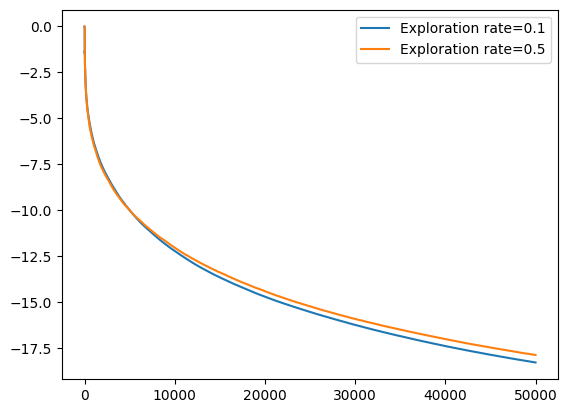

V: -18.269883329312233
Q: [ -18.26988333 -118.02338878  -18.26996028 -118.0403416   -18.26992524]


In [88]:
plt.plot(range(len(Vs[:])), Vs[:], label=f"Exploration rate={0.1}")
plt.plot(range(len(Vs2[:])), Vs2[:], label=f"Exploration rate={0.5}")
plt.plot(range(len(Vs3[:])), Vs3[:], label=f"Exploration rate={0.1}")
plt.legend()
plt.show()
print("V:", V[env.map[start]])
print("Q:", Q[env.map[start],:])

In [94]:
def demo_policy(env, policy):
    """!@brief Visualizes the moves of a given policy.
    
    Minotaur always fixed at (4,4). Moves are shown as arrows. 
    """
    LIGHT_GREEN  = '#95FD99'
    BLACK        = '#000000'
    WHITE        = '#FFFFFF'
    LIGHT_PURPLE = '#E8D0FF'
    RED          = '#FF0000';


    col_map = {0: WHITE, 1: BLACK, 2: LIGHT_GREEN, 3: LIGHT_PURPLE}

    # Size of the maze
    rows,cols = env.maze.shape

    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols,rows))

    # Remove the axis ticks and add title title
    ax = plt.gca()
    ax.set_title('Policy simulation at time step 0')
    ax.set_xticks([])
    ax.set_yticks([])

    # Give a color to each cell
    colored_maze = [[col_map[env.maze[j,i]] for i in range(cols)] for j in range(rows)]
    
    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols,rows))
    
    # Create a table to color
    grid = plt.table(cellText=None, cellColours=colored_maze, cellLoc='center',loc=(0,0),edges='closed')

    # Modify the hight and width of the cells in the table
    tc = grid.properties()['children']
    for cell in tc:
        cell.set_height(1.0/rows)
        cell.set_width(1.0/cols)

    minotaur_pos = (6,5)
    grid.get_celld()[(minotaur_pos)].set_facecolor(RED)
    grid.get_celld()[(minotaur_pos)].get_text().set_text('Minotaur')
    for x in range(7):
        for y in range(8):
            if env.maze[x,y] != 1 and (x,y) != (6,5) and (x,y) != minotaur_pos:
                a = policy[env.map[(x,y,*minotaur_pos, 0)]]
                # New markings
                if a == 0: 
                    arrow = 'wait'
                elif a == 1:
                    arrow = '\u2190'
                elif a == 2:
                    arrow = '\u2192'
                elif a == 3:
                    arrow = '\u2191'
                else:
                    arrow = '\u2193'
                grid.get_celld()[(x,y)].get_text().set_text(arrow)
    plt.show()

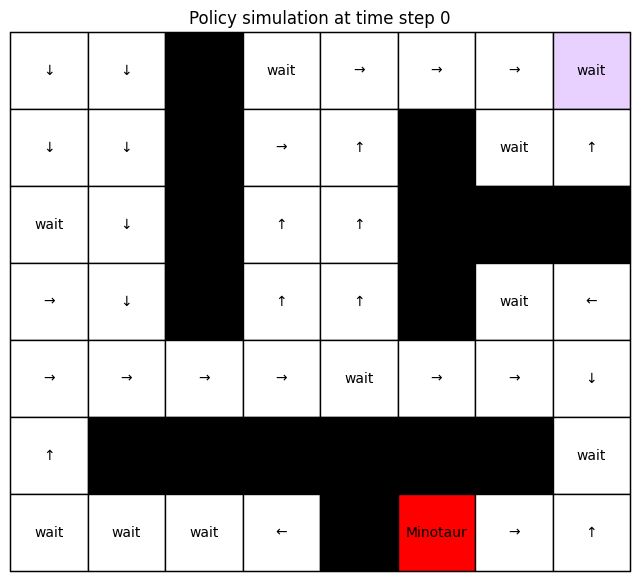

In [95]:
demo_policy(env, policy2)

In [90]:

# Size of the maze
# rows,cols = maze.shape;

# # Create figure of the size of the maze
# fig = plt.figure(1, figsize=(cols,rows));

# # Remove the axis ticks and add title title
# ax = plt.gca();
# ax.set_title('Policy simulation');
# ax.set_xticks([]);
# ax.set_yticks([]);

# # Give a color to each cell
# colored_maze = [[col_map[maze[j,i]] for i in range(cols)] for j in range(rows)];
path, dead = env.simulate(start, policy, method);
print(path)


[(0, 0, 6, 5, 0), (0, 0, 6, 6, 0), (1, 0, 5, 6, 0), (2, 0, 6, 6, 0), (1, 0, 5, 6, 0), (2, 0, 6, 6, 0), (1, 0, 5, 6, 0), (2, 0, 6, 6, 0), (1, 0, 6, 7, 0), (2, 0, 5, 7, 0), (2, 0, 5, 6, 0), (3, 0, 5, 5, 0), (4, 0, 6, 5, 0), (4, 1, 6, 6, 0), (4, 2, 6, 7, 0), (4, 3, 5, 7, 0), (3, 3, 4, 7, 0), (2, 3, 5, 7, 0), (2, 4, 6, 7, 0), (1, 4, 6, 6, 0), (2, 4, 6, 7, 0), (1, 4, 6, 6, 0), (2, 4, 5, 6, 0), (3, 4, 5, 5, 0), (2, 4, 5, 6, 0), (3, 4, 5, 5, 0), (2, 4, 5, 6, 0), (3, 4, 5, 5, 0), (2, 4, 5, 6, 0), (3, 4, 4, 6, 0), (2, 4, 4, 5, 0), (2, 4, 3, 5, 0), (1, 4, 2, 5, 0), (0, 4, 2, 6, 0), (0, 5, 2, 5, 0), (0, 6, 3, 5, 0), (0, 6, 2, 5, 0), (0, 7, 1, 5, 1), (0, 6, 1, 6, 1), (0, 5, 2, 6, 1), (0, 4, 2, 5, 1), (1, 4, 2, 6, 1), (2, 4, 1, 6, 1), (3, 4, 0, 6, 1), (4, 4, 0, 5, 1), (4, 5, 0, 4, 1), (4, 6, 0, 3, 1), (4, 7, 1, 3, 1), (5, 7, 1, 4, 1), (6, 7, 1, 3, 1), (6, 6, 1, 4, 1), (6, 5, 1, 5, 1), (6, 5, 2, 5, 1), (6, 5, 2, 6, 1), (6, 5, 2, 7, 1), (6, 5, 1, 7, 1), (6, 5, 2, 7, 1), (6, 5, 1, 7, 1), (6, 5, 0, 7, 

KeyboardInterrupt: 

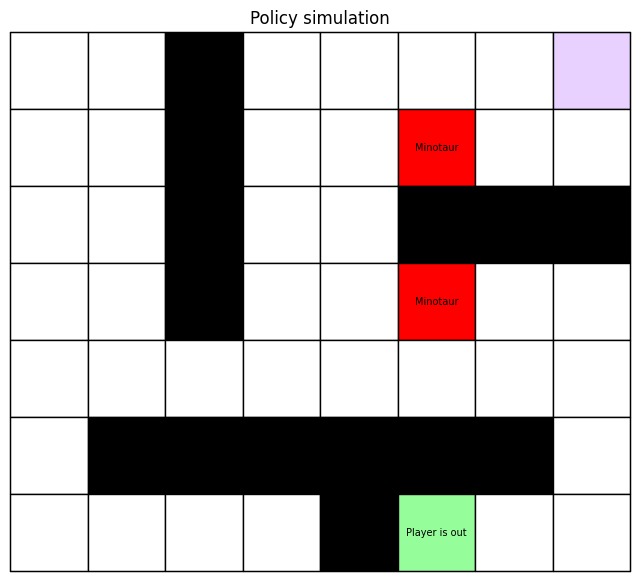

In [91]:
mz.animate_solution(maze, path)


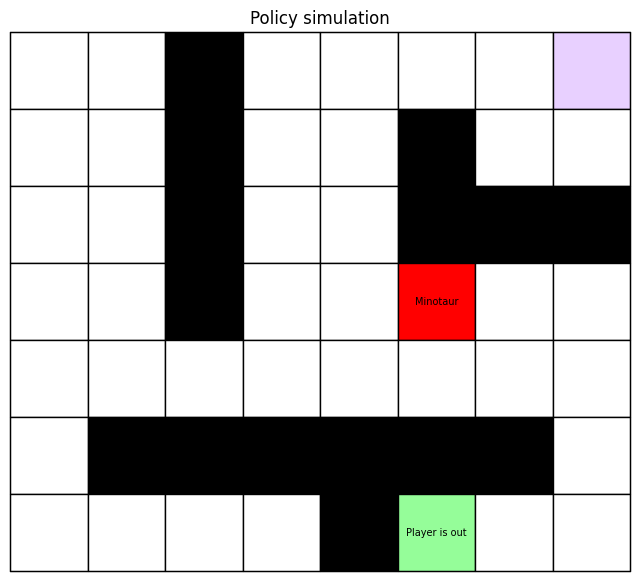

In [ ]:
import numpy as np
# import maze as mz 
import maze_bonus as mz
import matplotlib.pyplot as plt 

if __name__ == '__main__':
    maze = np.array([
        [0, 0, 1, 0, 0, 0, 0, 3],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 2, 0, 0]
    ])

    # Create an environment maze
    env = mz.Maze(maze, minotaur_stay=False)
    # env.show()

    # Finite horizon
    horizon = 30

    # minotaur_path = mz.minotaur.random_path(env,horizon)
    # mz.MINOTAUR_STAY = True

   

    # Simulate the shortest path starting from position A
    method = 'DynProg';
    start  = (0,0,6,5,0);

    p = np.zeros((30,1))
    V, policy= mz.dynamic_programming(env,horizon);
    path = env.simulate(start, policy, method);
    mz.animate_solution(maze, path)





In [ ]:
print(path)

[(0, 0, 6, 5, 0), (0, 1, 6, 4, 0), (1, 1, 6, 5, 0), (2, 1, 5, 5, 0), (3, 1, 6, 5, 0), (4, 1, 6, 4, 0), (4, 2, 6, 5, 0), (4, 3, 5, 5, 0), (4, 4, 6, 5, 0), (3, 4, 6, 4, 0), (2, 4, 6, 5, 0), (1, 4, 5, 5, 0), (0, 4, 5, 6, 0), (0, 5, 6, 6, 0), (0, 6, 6, 7, 0), (0, 7, 5, 7, 1), (0, 6, 4, 7, 1), (0, 5, 4, 6, 1), (0, 4, 5, 6, 1), (1, 4, 5, 5, 1), (2, 4, 4, 5, 1), (3, 4, 3, 5, 1), (4, 4, 4, 5, 1), (4, 5, 4, 4, 1), (4, 6, 3, 4, 1), (4, 7, 4, 4, 1), (5, 7, 3, 4, 1), (6, 7, 4, 4, 1), (6, 6, 4, 5, 1), (6, 5, 3, 5, 1), (6, 5, 3, 6, 1)]


In [13]:
import numpy as np

# Given initial point
# initial_point = np.array([2, 2])

# Given points to compare
points = [(2,2, 4, 5), (2,2, 4, 3), (2,2, 3, 4), (2,2, 5, 4)]
print()
print(np.linalg.norm(np.array(points[:][2:4])-np.array(points[:][:2]),axis=-))
# Calculate distances
distances = np.linalg.norm(points[:,2:4] - points[:,:2], axis=1)

# Find the closest point
closest_point_index = np.argmin(distances)
print(points[closest_point_index])
closest_point = points[closest_point_index]

min_distance = distances[closest_point_index]

print(f"The closest point to {points[0,:2]} is {closest_point[2:4]} with a distance of {min_distance:.2f}")

for i, next_s in enumerate(points):
    if i == closest_point_index:
        print("30%",next_s)
    else:
        print((1/(len(points)-1))*0.7*100,"%",next_s)
# print(np.append(points[:closest_point_index],points[closest_point_index+1:]).reshape(-1,4))


SyntaxError: invalid syntax (2877902044.py, line 9)